# 로지스틱 회귀

## iris 데이터로 로지스틱 회귀 수행

In [2]:
import sklearn.datasets as d

# iris 데이터 호출
# iris 데이터는 Setosa, Versicolour, Virginica와 같이 3개의 클래스로 구성됨.
iris = d.load_iris()

In [3]:
print("특성 :", iris.feature_names)
print("클래스 :", iris.target_names)

특성 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
클래스 : ['setosa' 'versicolor' 'virginica']


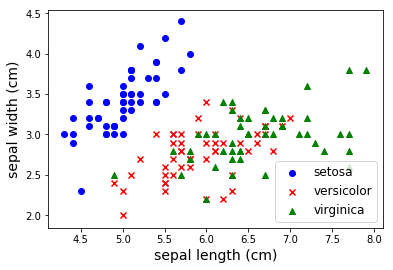

In [5]:
# 꽃받침의 길이와 너비 컬럼에 대해 산점도 그리기

import matplotlib.pyplot as plt

c_set = ["blue", "red", "green"]
m_set = ["o", "x", "^"]
l_set = iris.target_names

X = iris.data
y = iris.target

for t in set(y) :
    X_pts = [X[i, 0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i, 1] for i in range(len(y)) if y[i] == t]
    plt.scatter(X_pts, y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[0], fontsize = 14)
plt.ylabel(iris.feature_names[1], fontsize = 14)

# 범례
# loc = 'best' : 위치를 최적의 위치로 자동으로 지정
plt.legend(loc = 'best', fontsize = 12)

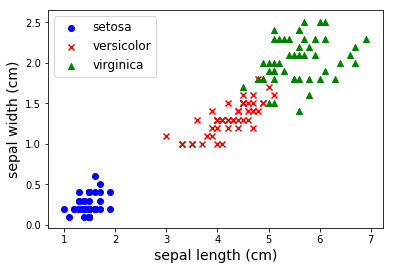

In [6]:
# 꽃잎의 길이와 너비 칼럼에 대해 산점도 그리기

import matplotlib.pyplot as plt

c_set = ["blue", "red", "green"]
m_set = ["o", "x", "^"]
l_set = iris.target_names

X = iris.data
y = iris.target

for t in set(y) :
    X_pts = [X[i, 2] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i, 3] for i in range(len(y)) if y[i] == t]
    plt.scatter(X_pts, y_pts, color = c_set[t], marker = m_set[t], label = l_set[t])

plt.xlabel(iris.feature_names[0], fontsize = 14)
plt.ylabel(iris.feature_names[1], fontsize = 14)

# 범례
# loc = 'best' : 위치를 최적의 위치로 자동으로 지정
plt.legend(loc = 'best', fontsize = 12)

In [10]:
# 데이터를 학습용과 검증용으로 분리

import sklearn.model_selection as ms
import numpy as np

X_ptls = X[:, 2:4]
y_vgnc = (y == 2).astype(np.int)

X_train, X_test, y_train, y_test = ms.train_test_split(X_ptls, y_vgnc, test_size = 0.3, random_state = 42)

In [11]:
X_train[0:3,]

array([[3.7, 1. ],
       [5.1, 1.5],
       [5.5, 1.8]])

In [12]:
y_train[0:3,]

array([0, 1, 1])

In [14]:
# linear_model 모듈에 있는 LogisticRegression을 이용해 로지스틱 회귀 수행
# 매개변수 solver : 회귀를 수행할 알고리즘의 이름, 기본값은 liblinear

import sklearn.linear_model as lm

logr = lm.LogisticRegression(solver = "liblinear")
reg = logr.fit(X_train, y_train)

In [15]:
# 검증 데이터로 예측 수행. metrics 모듈에 있는 accuracy_score 함수를 이용해 정확도 계산
# 첫번째 매개변수는 검증 데이터의 클래스 실제값, 두번째 매개변수는 클래스 예측값

import sklearn.metrics as mt

y_pred = reg.predict(X_test)

# 정확도 체크. 로지스틱 회귀에서는 R2 스코어는 의미가 없다.
accuracy = mt.accuracy_score(y_test, y_pred)
print("예측 정확도: ", round(accuracy, 3))

예측 정확도:  0.956


## breast cancer 데이터로 로지스틱 회귀 수행

In [16]:
# breast_cancer 데이터 불러오기
import sklearn.datasets as d
cancer = d.load_breast_cancer()

In [17]:
# 데이터 요약본
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [19]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [22]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [23]:
# 독립변수와 종속변수 지정
X = cancer.data
y = cancer.target

In [26]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
# 로지스틱 회귀 객체 생성 후 학습
import sklearn.linear_model as lm

reg = lm.LogisticRegression(solver = "liblinear").fit(X_train, y_train)

In [30]:
# 예측 후 정확도 체크
y_pred = reg.predict(X_test)
score = mt.accuracy_score(y_test, y_pred)
print(score)

0.9649122807017544


In [32]:
# 진짜 0.96만큼 정확한지, 아니면 어디서 실수를 한 것인지 검사
print(y_test[0:10])  # 1 : 악성, 0 : 양성
print(y_pred[0:10])  # 앞의 10개 레코드가 똑같으므로 거의 맞게 예측했다고 확인 가능

[1 0 0 1 1 0 0 0 1 1]
[1 0 0 1 1 0 0 0 1 1]


# 분류기법개요

In [35]:
# 실제값과 예측값 데이터
# 1 : 스팸(양성), 0 : 정상(음수)
actual_result = [1, 0, 0, 1, 1]
predicted_result = [0, 1, 0, 1, 0]

In [37]:
import sklearn.metrics as mt

# 정확도
accuracy = mt.accuracy_score(actual_result, predicted_result)

# 오차행렬
matrix = mt.confusion_matrix(actual_result, predicted_result)

# 정밀도
precision = mt.precision_score(actual_result, predicted_result)

# 재현율
recall = mt.recall_score(actual_result, predicted_result)

# f1 score
f1score = mt.f1_score(actual_result, predicted_result)

# 전체보고서
scores = mt.classification_report(actual_result, predicted_result)

In [39]:
print("정확도: ", accuracy, "\n")
print("오차행렬\n", matrix, "\n")
print("정밀도: ", precision, "\n")
print("재현율: ", round(recall, 3), "\n")
print("F1스코어: ", f1score, "\n")

정확도:  0.4 

오차행렬
 [[1 1]
 [2 1]] 

정밀도:  0.5 

재현율:  0.333 

F1스코어:  0.4 



In [40]:
print("결과\n", scores)
# 0과 1은 각각 클래스
# support는 개수 : 0번 클래스는 2개, 1번 클래스는 3개, 전체 5개

결과
              precision    recall  f1-score   support

          0       0.33      0.50      0.40         2
          1       0.50      0.33      0.40         3

avg / total       0.43      0.40      0.40         5



In [ ]:
# micro avg : 개별적인 것들의 평균. 5개 데이터 각각의 precision들의 평균. 데이터 개수로 나눈다. 중요
# macro avg : 덩어리(클래스)별 평균. 클래스 개수로 나눈다.